# Домашнее задание №2
## Pandas


### В этом домашнем задании не будет как таковых задач. Только несколько простых заданий, чтобы освоиться в важнейшей библиотеке pandas.

### №1
Импортируйте пандас как pd и считайте файл TSLA.csv (https://www.kaggle.com/efekurdoglu/teslastockprice/data) как датафрейм

In [354]:
import pandas as pd 
import numpy as np
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2574,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800


## №2
Удалите из столбца Close значения, целые части которых кратны 6

In [355]:
def delete(x):
    if (x//1)%6==0:
        x=np.NaN
    return x
df["Close"] = df["Close"].apply(delete)

## №3
Теперь попробуйте заполнить пропуски средним значением в столбце, потом минимумом, потом медианой

In [436]:
mean = df["Close"].mean()
med= df["Close"].median()
minim = df["Close"].min()
df.Close.fillna(mean)
df.Close.fillna(minim)
df.Close.fillna(mid)[96:99]






96     5.968000
97    44.859753
98     5.934000
Name: Close, dtype: float64

## №4
А теперь попробуйте заполнить эти пропуски средним между всеми значениями, кратным 5 и всеми значениями, кратным 7 (т.е. выберите все значение, кратные 5 и найдите их среднее, а потом все значение, кратные 7, найдите среднее среди них, а потом усредните два полученных значения).

In [437]:
df.Close = df.Close.fillna((df[df.Close.fillna(3).astype(int) % 5 == 0]['Close'].mean()+df[df.Close.fillna(3).astype(int) % 7 == 0]['Close'].mean())/2)
df[96:99]

,Date,Open,High,Low,Close,Adj Close,Volume
96,2010-11-12,5.650,6.1,5.614,5.968000,5.968,13645500
97,2010-11-15,6.044,6.588,6.044,44.859753,6.160,13114500
98,2010-11-16,6.200,6.28,5.684,5.934000,5.934,6738000


## №5
Импортируйте matplotlib.pyplot как plt. Постройте графики получишвихся наборов значений. Чтобы получше разглядеть, найдите как в pyplot задать размер графика и поставьте побольше. <br>
Оцените результаты, выберите какой вариант кажется наиболее разумным.

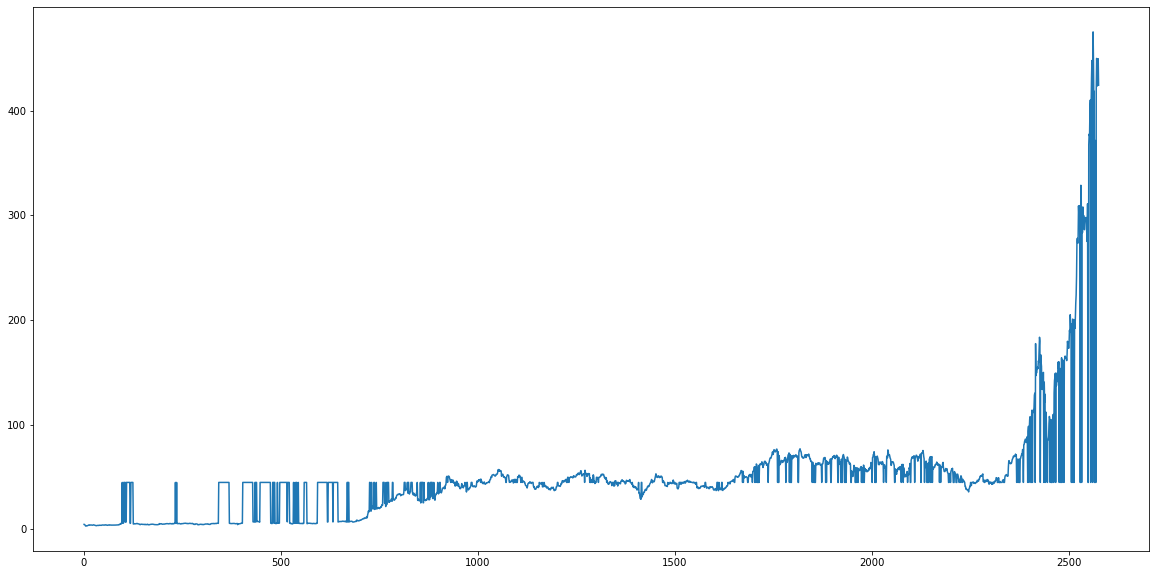

In [438]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df.index, df.Close)

## №6
Приведите столбец High к строковому типу. Найдите все строки, где содержится цифра 9. <br>
*Подсказка*: загуглите pandas.str

In [439]:
df[['9' in s for s in df["High"].astype(str)]]

,Date,Open,High,Low,Close,Adj Close,Volume
23,2010-08-02,4.100000,4.194,4.066000,4.184000,4.184000,3590500
24,2010-08-03,4.200000,4.39,4.164000,4.390000,4.390000,6152500
28,2010-08-09,3.980000,3.996,3.890000,3.920000,3.920000,4063500
29,2010-08-10,3.930000,3.93,3.764000,3.806000,3.806000,6406500
32,2010-08-13,3.636000,3.69,3.532000,3.664000,3.664000,3170000
...,...,...,...,...,...,...,...
2568,2020-09-10,386.209991,398.98999,360.559998,371.339996,371.339996,84930600
2571,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,97298200
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200


## №7
А теперь найдите в этом столбце строки, которые содержат цифру 4, но не содержат цифру 8.

In [440]:
df[['9' and not '8' in s for s in df["High"].astype(str)]]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.0,3.508000,4.778000,4.778000,93831500
3,2010-07-02,4.600000,4.62,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.0,3.166000,3.222000,3.222000,34334500
5,2010-07-07,3.280000,3.326,2.996000,3.160000,3.160000,34608500
6,2010-07-08,3.228000,3.504,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2574,2020-09-18,447.940002,451.0,428.799988,442.149994,442.149994,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800


## №8
И наконец найдите в столбце Hihg (пусть там все еще будет строковый тип) такие строчки, у которых в дробной части есть цифра 3 и замените ее на 4. <br>
*Подсказка*: может помочь метод split. <br>
А потом замените эти значения в датафрейме на какое-нибудь слово. Например, лопата.

In [442]:
df[['3' in s.split(".")[1] for s in df["High"].astype(str)]].High.apply(lambda x: x.split(".")[0]+"."+x.split(".")[1].replace("3","4"))

5            3.426
10            4.04
11             4.4
14            4.47
17           4.412
           ...    
2536    309.588014
2549    330.245992
2554     404.49801
2566     368.74999
2575    455.679994
Name: High, Length: 586, dtype: object

In [435]:
df[['3' in s.split(".")[1] for s in df["High"].astype(str)]].High.apply(lambda x: "лопата")

5       лопата
10      лопата
11      лопата
14      лопата
17      лопата
         ...  
2536    лопата
2549    лопата
2554    лопата
2566    лопата
2575    лопата
Name: High, Length: 586, dtype: object

## №9
Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

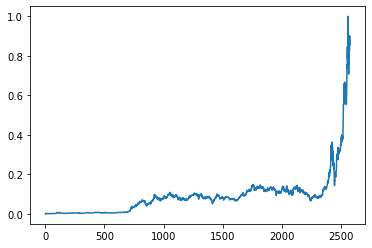

In [444]:
xmin = df.Open.min()
xmax = df.Open.max()
plt.plot(df.index, df.Open.apply(lambda x: (x-xmin)/(xmax-xmin)))

## №10
И, правда наконец, создайте пустой датафрейм с такими же колонками, как TSLA. Пусть в нем будет 10 строк. И пусть они будут заполнены такими значениями: в i-й строке j-го столбца должна быть j-ая степень числа i+j. Добавьте этот датафрейм в конец исходного. <br>
Используйте метод tail, чтобы увидеть конец полученного датафрейма и порадоваться, что у вас все получилось и вы готовы реально обрабатывать датафреймы и заниматься дата сасом.

In [477]:
A = []
for i in range(1,11):
    B = []
    for j in range(1,len(df.columns)+1):
        B.append((i+j)**j)
    A.append(B)
df2 = pd.DataFrame(A, columns = df.columns.values)
df.append(df2, ignore_index=True).tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
2567,2020-09-09,356.600006,369.0,341.510010,44.859753,3.662800e+02,79465800
2568,2020-09-10,386.209991,398.98999,360.559998,371.339996,3.713400e+02,84930600
2569,2020-09-11,381.940002,382.5,360.500000,44.859753,3.727200e+02,60717500
2570,2020-09-14,380.950012,420.0,373.299988,419.619995,4.196200e+02,83020600
2571,2020-09-15,436.559998,461.940002,430.700012,449.760010,4.497600e+02,97298200
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,4.417600e+02,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,4.234300e+02,76779200
2574,2020-09-18,447.940002,451.0,428.799988,442.149994,4.421500e+02,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,4.493900e+02,109476800
2576,2020-09-22,429.600006,437.76001,417.600006,424.230011,4.242300e+02,73640900
